In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
print(os.getcwd())
os.chdir('./../')
print(os.getcwd())

d:\Kike\UNI\1º\Introduccion a la ciencia de datos\Practicas\notebooks
d:\Kike\UNI\1º\Introduccion a la ciencia de datos\Practicas


# Escalado en estaciones
Aplicación de transformaciones de variables para analizar los datos de estaciones.

El escalado tiene como objetivo obtener generalizaciones mejores en el modelado.

In [3]:
dfe = pd.read_csv('./data/interim/estaciones.csv')
dfe.tail()

,number,uso_bici,address,lat,lon,total,nombre,coddistrit,codbarrio
268,272,673,Vicente la Roda - Ingeniero Fausto Elio,39.480623,-0.332190,15,LA MALVA-ROSA,11,3
269,273,340,Moraira - Alta del Mar,39.450305,-0.333272,15,NATZARET,11,5
270,274,216,San Francisco de Paula - Castell de Pop,39.448070,-0.333188,15,NATZARET,11,5
271,275,418,Moreras - Rona de Nazaret,39.452305,-0.335065,20,LA PUNTA,10,6
272,276,1029,Veles e Vents,39.461975,-0.323765,20,EL GRAU,11,1


[Preprocesamiento con Scikitlearn, escalado lineal, no lineal, tranformaciones, codificación de categorías](https://qu4nt.github.io/sklearn-doc-es/modules/preprocessing.html#preprocessing-data)

La normalización lineal uniforme: $v' = \frac{v - \min}{\max - \min}$ es un ejemplo en el que los datos pasan a estar entre 0 y 1.

In [4]:
atributo = 'uso_bici'
# Ejemplo de normalización
dfe[f"{atributo}_norm"] = (dfe[atributo] - dfe[atributo].min()) / (dfe[atributo].max() - dfe[atributo].min())
# Ejemplo transformaciones
dfe[f"{atributo}_normed"] = (dfe[atributo] - dfe[atributo].mean())
dfe[f"{atributo}_tip"] = (dfe[atributo] - dfe[atributo].mean()) / dfe[atributo].std()
dfe[f"{atributo}_sqrt"] = np.sqrt(dfe[atributo])
dfe[f"{atributo}_pow"] = np.pow(dfe[atributo], 2)

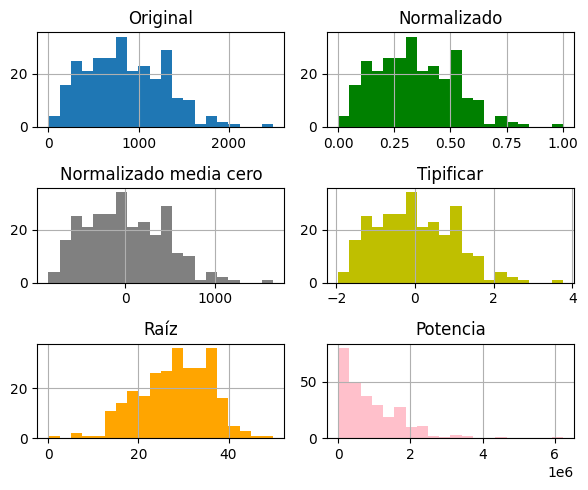

In [5]:
fig, ax = plt.subplots(3, 2, figsize=(6, 5))
axs = ax.flatten()
ax = dfe[atributo].hist(bins=20, ax=axs[0])
ax.set_title('Original')
ax = dfe[f"{atributo}_norm"].hist(bins=20, ax=axs[1], color='g')
ax.set_title('Normalizado')
ax = dfe[f"{atributo}_normed"].hist(bins=20, ax=axs[2], color='gray')
ax.set_title('Normalizado media cero')
ax = dfe[f"{atributo}_tip"].hist(bins=20, ax=axs[3], color='y')
ax.set_title('Tipificar')
ax = dfe[f"{atributo}_sqrt"].hist(bins=20, ax=axs[4], color='orange')
ax.set_title('Raíz')
ax = dfe[f"{atributo}_pow"].hist(bins=20, ax=axs[5], color='pink')
ax.set_title('Potencia')
fig.tight_layout()
plt.show()

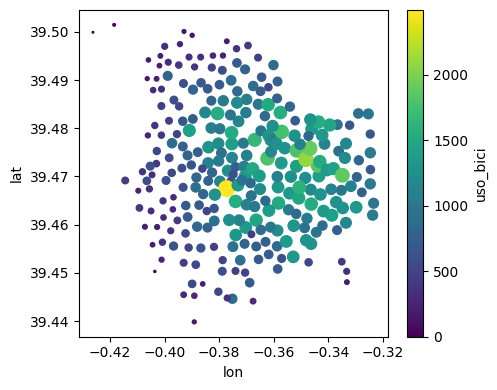

In [6]:
# Revisamos las unidades
x_feat, y_feat, size = 'lon', 'lat', 'uso_bici'
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax = ax.scatter(dfe[x_feat], dfe[y_feat], 
                s=(dfe[size]*0.05), c=dfe[size], cmap='viridis')
plt.ylabel(y_feat)
plt.xlabel(x_feat)
fig.tight_layout()
cbar = plt.colorbar(ax)
cbar.set_label(size)
plt.show()

In [7]:
x_feat, y_feat, size = 'lon', 'lat', 'uso_bici'
# Trabajamos con la librería scikit-learn
prep_scaling = preprocessing.MinMaxScaler()
# prep_scaling = preprocessing.Normalizer("l1")
# prep_scaling = preprocessing.StandardScaler()
# prep_scaling = preprocessing.MaxAbsScaler()
# prep_scaling = preprocessing.RobustScaler()
# prep_scaling = preprocessing.QuantileTransformer(n_quantiles=6)

# Primero se entrena/ajusta el transformador
transf = prep_scaling.fit(dfe.loc[:, [x_feat, y_feat, size]].values)

# Luego se transforman los datos
data_transf = transf.transform(dfe.loc[:, [x_feat, y_feat, size]].values)

# Creamos el dataframe con el resultado
df2gm = pd.DataFrame(data_transf, 
                     columns=[x_feat, y_feat, size])
df2gm.head()

,lon,lat,uso_bici
0,0.421284,0.652642,0.432237
1,0.452208,0.650161,0.400962
2,0.446958,0.600597,0.482759
3,0.495042,0.599169,0.561748
4,0.535893,0.601571,0.399358


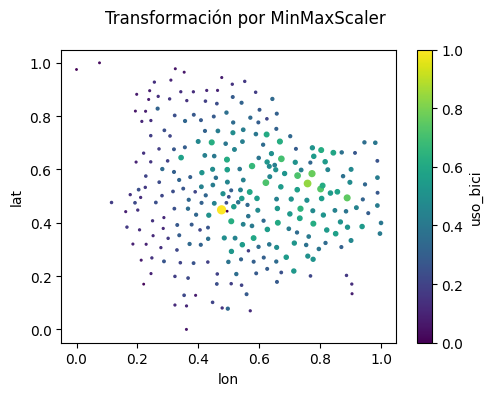

In [8]:
x_feat, y_feat, size = 'lon', 'lat', 'uso_bici'
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax = ax.scatter(df2gm[x_feat], df2gm[y_feat], 
                s=(df2gm[size]+1)**5, c=df2gm[size],
                cmap='viridis')
fig.suptitle("Transformación por MinMaxScaler")
plt.ylabel(y_feat)
plt.xlabel(x_feat)
fig.tight_layout()
cbar = plt.colorbar(ax)
cbar.set_label(size)
plt.show()

d:\Kike\UNI\1º\Introduccion a la ciencia de datos\Practicas\mientorno\Lib\site-packages\matplotlib\collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


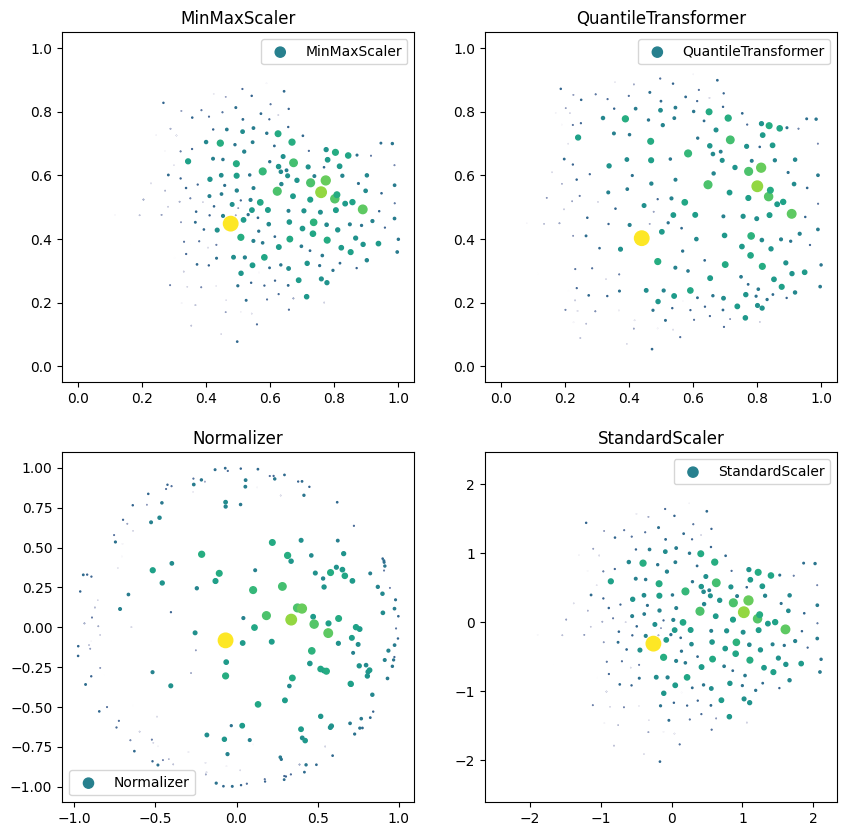

In [9]:
x_feat, y_feat, size = 'lon', 'lat', 'uso_bici'
standard_scaler = preprocessing.StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler()
# Definir el parámetro de quantiles
quantile_scaler = preprocessing.QuantileTransformer(n_quantiles=5)
normalizer = preprocessing.Normalizer()
dfe[[x_feat, y_feat, size]] = standard_scaler.fit_transform(dfe[[x_feat, y_feat, size]].values)
minmax_data = min_max_scaler.fit_transform(dfe[[x_feat, y_feat, size]].values)
quantile_data = quantile_scaler.fit_transform(dfe[[x_feat, y_feat, size]].values)
normalize_data = normalizer.fit_transform(dfe[[x_feat, y_feat, size]].values)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
multip = 3
# Plot the data on each subplot
axs[0, 0].scatter(minmax_data[:,0], minmax_data[:,1],
                  label='MinMaxScaler', s=(dfe[size]+1)**multip, 
                  c=dfe[size], cmap='viridis')
axs[0, 0].set_title('MinMaxScaler')
axs[0, 0].legend()

axs[0, 1].scatter(quantile_data[:,0], quantile_data[:,1], 
                  label='QuantileTransformer', s=(dfe[size]+1)**multip, 
                  c=dfe[size], cmap='viridis')
axs[0, 1].set_title('QuantileTransformer')
axs[0, 1].legend()

axs[1, 0].scatter(normalize_data[:,0], normalize_data[:,1], 
                  label='Normalizer', s=(dfe[size]+1)**multip, 
                  c=dfe[size], cmap='viridis')
axs[1, 0].set_title('Normalizer')
axs[1, 0].legend()

# Original data in yellow is plotted on the last subplot
axs[1, 1].scatter(dfe['lon'], dfe['lat'], label='StandardScaler', 
                  s=(dfe[size]+1)**multip, c=dfe[size], cmap='viridis')  
axs[1, 1].set_title('StandardScaler')
axs[1, 1].legend()

plt.show()

In [17]:
df2gm.to_csv('./data/processed/estaciones_tansformadas.csv', index=False)

# Uso de bicis
En el dataset objetivo "usobarriosmeteo.csv" vamos a transformar los datos para ampliar características.
> Hipótesis: la hora del día puede ser un factor que defina el comportamiento del cliente según la zona de la ciudad

In [18]:
df = pd.read_csv('./data/interim/usobarriosmeteo.csv')
df.tail()

,prec,vmax,vv,hr,ta,tpr,tamin,tamax,fecha,uso_bici,name
47105,0.0,8.6,2.0,81.0,14.1,10.9,13.7,14.1,2025-03-03 06:00:00+00:00,1.0,SOTERNES
47106,0.0,9.2,2.1,81.0,14.3,11.1,14.1,14.4,2025-03-03 07:00:00+00:00,2.0,SOTERNES
47107,0.6,9.3,2.2,81.0,14.1,10.9,14.1,14.4,2025-03-03 08:00:00+00:00,0.0,SOTERNES
47108,1.5,8.0,2.3,81.0,14.3,11.1,14.0,14.4,2025-03-03 09:00:00+00:00,1.0,SOTERNES
47109,1.2,9.7,2.9,81.0,14.4,11.2,14.2,14.4,2025-03-03 10:00:00+00:00,0.0,SOTERNES


In [19]:
# Transformar a datetime si no tiene el tipo 
df.dtypes

prec        float64
vmax        float64
vv          float64
hr          float64
ta          float64
tpr         float64
tamin       float64
tamax       float64
fecha        object
uso_bici    float64
name         object
dtype: object

In [24]:
df['fecha'] = pd.to_datetime(df['fecha'])
df['hora'] = pd.to_datetime(df['fecha']).dt.hour
df['dia'] = pd.to_datetime(df['fecha']).dt.day
df['mes'] = pd.to_datetime(df['fecha']).dt.month
df['anio'] = pd.to_datetime(df['fecha']).dt.year
df['dia_nombre'] = pd.to_datetime(df['fecha']).dt.day_name()
# Monday=0, Sunday=6
df['dia_semana'] = df['fecha'].dt.day_of_week
df['findesemana'] = np.where(df['dia_semana']>4, 1, 0)

In [25]:
df.columns

Index(['prec', 'vmax', 'vv', 'hr', 'ta', 'tpr', 'tamin', 'tamax', 'fecha',
       'uso_bici', 'name', 'hora', 'dia', 'mes', 'anio', 'dia_nombre',
       'dia_semana', 'findesemana'],
      dtype='object')

In [26]:
df['dia_nombre'].value_counts()

dia_nombre
Monday       7420
Tuesday      6720
Sunday       6720
Saturday     6720
Friday       6650
Wednesday    6580
Thursday     6300
Name: count, dtype: int64

In [27]:
df_dias = pd.get_dummies(df['dia_nombre']).astype(int)
pd.concat([df, df_dias], axis=1).sample(10)

,prec,vmax,vv,hr,ta,tpr,tamin,tamax,fecha,uso_bici,...,dia_nombre,dia_semana,findesemana,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
31151,0.0,1.2,0.0,77.0,11.8,7.8,11.8,12.4,2025-02-11 01:00:00+00:00,1.0,...,Tuesday,1,0,0,0,0,0,0,1,0
38095,0.0,0.0,0.0,79.0,13.0,9.4,12.8,13.2,2025-02-19 23:00:00+00:00,3.0,...,Wednesday,2,0,0,0,0,0,0,0,1
17647,0.0,2.9,1.4,70.0,7.9,2.7,7.7,8.0,2025-02-09 05:00:00+00:00,0.0,...,Sunday,6,1,0,0,0,1,0,0,0
34872,0.0,0.0,0.0,47.0,12.7,1.7,12.7,13.1,2025-02-25 22:00:00+00:00,7.0,...,Tuesday,1,0,0,0,0,0,0,1,0
27172,0.0,4.9,0.0,34.0,18.7,2.5,17.5,19.2,2025-02-13 12:00:00+00:00,17.0,...,Thursday,3,0,0,0,0,0,1,0,0
25358,0.0,0.0,0.0,80.0,11.9,8.5,11.8,12.4,2025-02-22 01:00:00+00:00,4.0,...,Saturday,5,1,0,0,1,0,0,0,0
36935,0.0,0.0,0.0,64.0,10.3,3.8,10.1,10.4,2025-02-28 02:00:00+00:00,0.0,...,Friday,4,0,1,0,0,0,0,0,0
39782,0.0,2.4,1.3,71.0,6.8,1.9,6.7,7.0,2025-02-06 03:00:00+00:00,0.0,...,Thursday,3,0,0,0,0,0,1,0,0
38329,0.0,6.4,2.9,71.0,10.5,5.5,10.3,10.7,2025-03-02 03:00:00+00:00,0.0,...,Sunday,6,1,0,0,0,1,0,0,0
2711,0.0,0.8,0.3,64.0,9.2,2.7,9.2,10.1,2025-02-03 19:00:00+00:00,20.0,...,Monday,0,0,0,1,0,0,0,0,0


In [22]:
df.to_csv('./data/processed/usobarriosmeteo.csv', index=False)

# Conclusiones
- Se tiene exploran las opciones para transformar datos
- El escalado puede ser útil para datos con unidades muy dispares
- La extracción de características puede mejorar el aprendizaje automático